In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Change path.
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

from src.experiment import Experiment
from src.argparser import read_json

In [2]:
from src.data_loader import ChestXRay

In [3]:
dl = ChestXRay()

### Run experiment with just one image/batch

In [4]:
# Read parameters.
params = {
    "num_epochs": 40,
    "data": "CIFAR",
    "index": 1,
    "batch_size": 1,
    "n_repeats": 1,
    "init_type": "uniform",
    "measure": "euclidean",
    "Q": 1,
    "val_size": 2,
    "lr": 0.1,
    "nn": "LeNet",
    "optimizer": "LBFGS"
}
params = {
    "num_epochs": 41,
    "data": "Medical",
    "index": 23,
    "batch_size": 1,
    "n_repeats": 1,
    "init_type": "uniform",
    "measure": "euclidean",
    "Q": 1,
    "val_size": 10,
    "lr": 0.1,
#     "sigma": 1000,
    "nn": "LeNet",
    "optimizer": "LBFGS"
}

torch.manual_seed(1234)

# Load experiment.
exp = Experiment(params=params, rand_ims=False)

Running on cuda


In [5]:
# Run training
exp.train()

0 167.9628295898
10 1.3430638313
20 0.0385735370
30 0.0061253086
40 0.0020917251


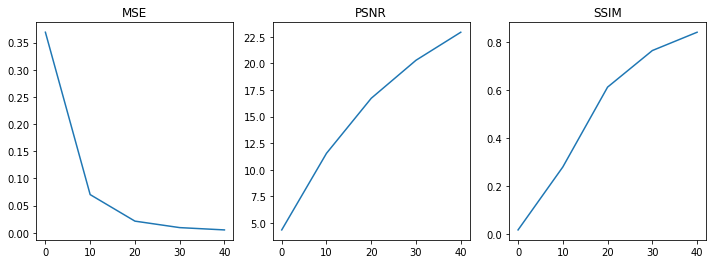

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(exp.iters, exp.losses['mse'][0])
ax[0].set_title('MSE')
ax[1].plot(exp.iters, exp.losses['psnr'][0])
ax[1].set_title('PSNR')
ax[2].plot(exp.iters, exp.losses['ssim'][0])
ax[2].set_title('SSIM')
plt.show()

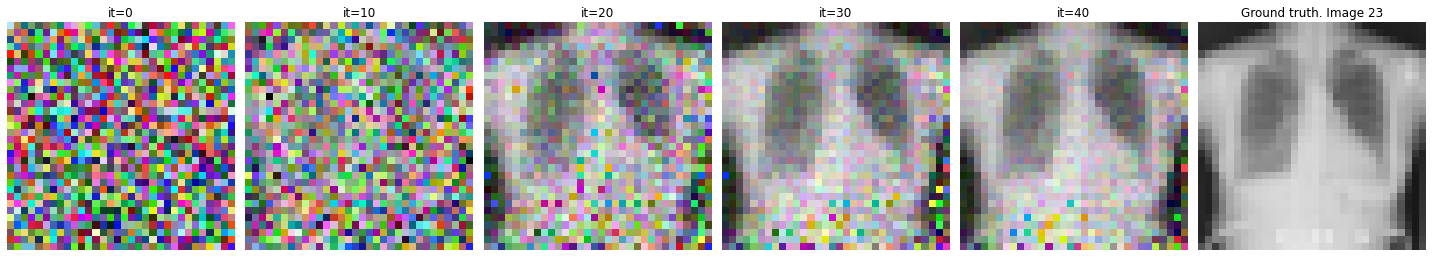

In [7]:
exp.make_reconstruction_plots(figsize=(20,10))

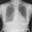

In [74]:
exp.tt(exp.gt_data[0])

In [13]:
exp.format_image(exp.used_indices[0][0])

tensor([[[[0.1843, 0.1804, 0.1725,  ..., 0.1255, 0.1294, 0.1451],
          [0.1804, 0.1765, 0.1725,  ..., 0.1216, 0.1255, 0.1373],
          [0.1725, 0.1686, 0.1647,  ..., 0.1137, 0.1176, 0.1294],
          ...,
          [0.1451, 0.1922, 0.5216,  ..., 0.2314, 0.0941, 0.2353],
          [0.1647, 0.3922, 0.5176,  ..., 0.3647, 0.1176, 0.2588],
          [0.3294, 0.4863, 0.2314,  ..., 0.4275, 0.1216, 0.2824]],

         [[0.1843, 0.1804, 0.1725,  ..., 0.1255, 0.1294, 0.1451],
          [0.1804, 0.1765, 0.1725,  ..., 0.1216, 0.1255, 0.1373],
          [0.1725, 0.1686, 0.1647,  ..., 0.1137, 0.1176, 0.1294],
          ...,
          [0.1451, 0.1922, 0.5216,  ..., 0.2314, 0.0941, 0.2353],
          [0.1647, 0.3922, 0.5176,  ..., 0.3647, 0.1176, 0.2588],
          [0.3294, 0.4863, 0.2314,  ..., 0.4275, 0.1216, 0.2824]],

         [[0.1843, 0.1804, 0.1725,  ..., 0.1255, 0.1294, 0.1451],
          [0.1804, 0.1765, 0.1725,  ..., 0.1216, 0.1255, 0.1373],
          [0.1725, 0.1686, 0.1647,  ..., 0

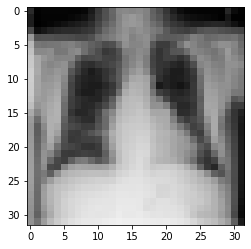

In [45]:
plt.imshow(np.transpose(exp.tp(exp.dst[0][0]).numpy(), (1, 2, 0)))

### Run experiment on multiple images/batches to get more descriptive result

In [9]:
exp = Experiment(params, verbose=False)

Running on cpu
Files already downloaded and verified


In [10]:
exp.run_multiple()
exp.save_experiment()

In [16]:
# Example of initializing new Experiment and loading previous results
#exp_new = Experiment()
#exp_new.load_experiment("results/CIFAR_gaussian_shift_euclidean_5_200_211604_225515")

Running on cpu
Files already downloaded and verified


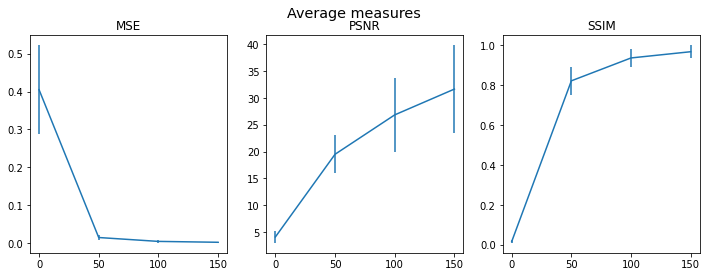

In [14]:
mses = np.mean(exp.losses['mse'], axis=0)
mse_stds = np.std(exp.losses['mse'], axis=0)
psnrs = np.mean(exp.losses['psnr'], axis=0)
psnr_stds = np.std(exp.losses['psnr'], axis=0)
ssims = np.mean(exp.losses['ssim'], axis=0)
ssim_stds = np.std(exp.losses['ssim'], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average measures', fontsize='x-large')
ax[0].errorbar(exp.iters, mses, mse_stds)
ax[0].set_title('MSE')
ax[1].errorbar(exp.iters, psnrs, psnr_stds)
ax[1].set_title('PSNR')
ax[2].errorbar(exp.iters, ssims, ssim_stds)
ax[2].set_title('SSIM')
plt.show()

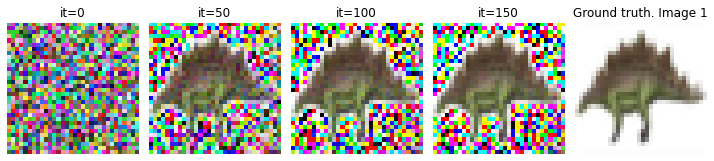

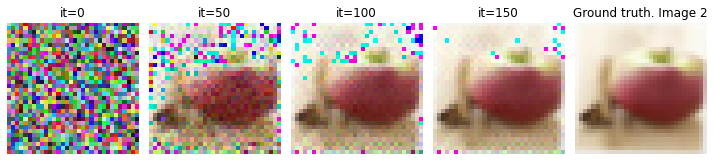

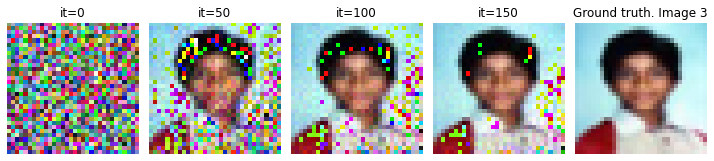

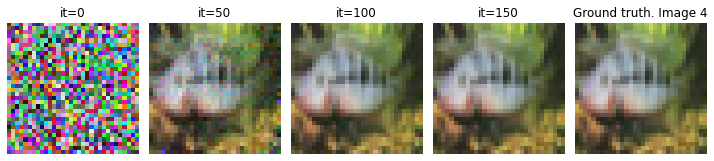

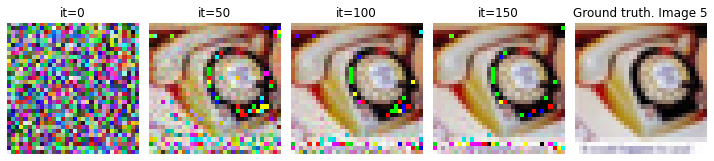

In [17]:
for t_ids in range(exp.n_repeats):
    exp.make_reconstruction_plots(train_id=t_ids, figsize=(10,8))

### Compare with other algorithm

In [12]:
# Read parameters.
name = "DLGunif"
params = read_json('params/'+name+'.json')

torch.manual_seed(1234)

# Load experiment.
exp = Experiment(params, verbose=False)
exp.run_multiple()

Running on cpu
Files already downloaded and verified


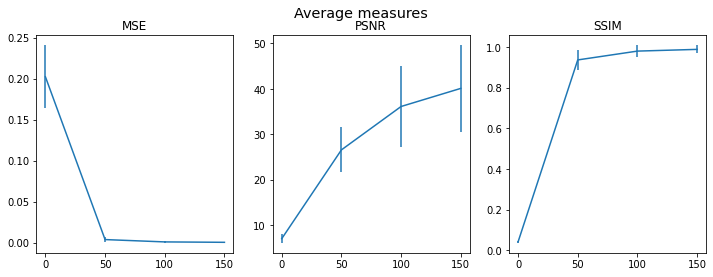

In [13]:
mses = np.mean(exp.losses['mse'], axis=0)
mse_stds = np.std(exp.losses['mse'], axis=0)
psnrs = np.mean(exp.losses['psnr'], axis=0)
psnr_stds = np.std(exp.losses['psnr'], axis=0)
ssims = np.mean(exp.losses['ssim'], axis=0)
ssim_stds = np.std(exp.losses['ssim'], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average measures', fontsize='x-large')
ax[0].errorbar(exp.iters, mses, mse_stds)
ax[0].set_title('MSE')
ax[1].errorbar(exp.iters, psnrs, psnr_stds)
ax[1].set_title('PSNR')
ax[2].errorbar(exp.iters, ssims, ssim_stds)
ax[2].set_title('SSIM')
plt.show()

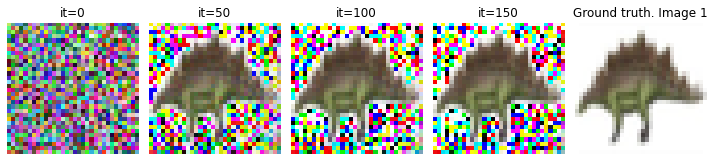

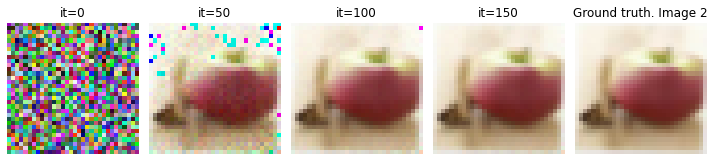

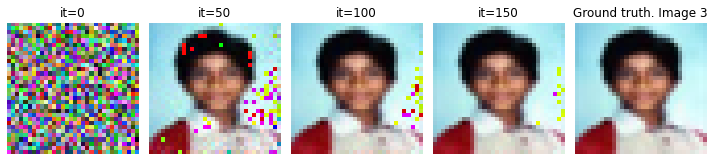

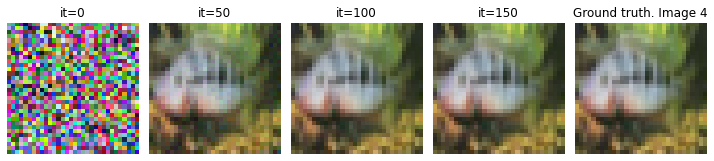

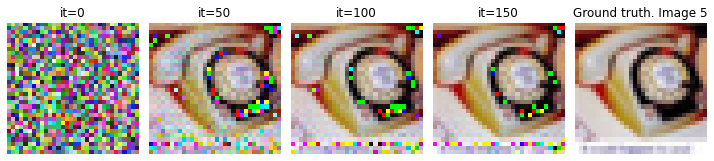

In [14]:
for t_ids in range(exp.n_repeats):
    exp.make_reconstruction_plots(train_id=t_ids, figsize=(10,8))